# Goal

To show that Linear Regression model is sufficient for non-linear relationships.

# Given

Targets generated non-linearly 
* $y = x^2$
* $y = cos(x/2)$

# Find

Polynom using Linear Regression
* 1 - without scaling
* 2 - with scaling

# Solution

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from GD import GD, ScaleFeatures

## Find polynom for $y = x^2$

In [40]:
x = np.arange(20)
y = x**2

### Generate variables for n-th polynom

In [41]:
x_poly = np.c_[x, x**2, x**3]

### Run GD

In [42]:
iterations = 100000

w, b, log = GD(x_poly, y, iterations) # alpha is default

### Evaluate importance by looking at weights

In [43]:
w

array([0.01166002, 0.07759825, 0.05522137])

### Evaluate importance by relationship to y

Linear relationship shows more relevant features

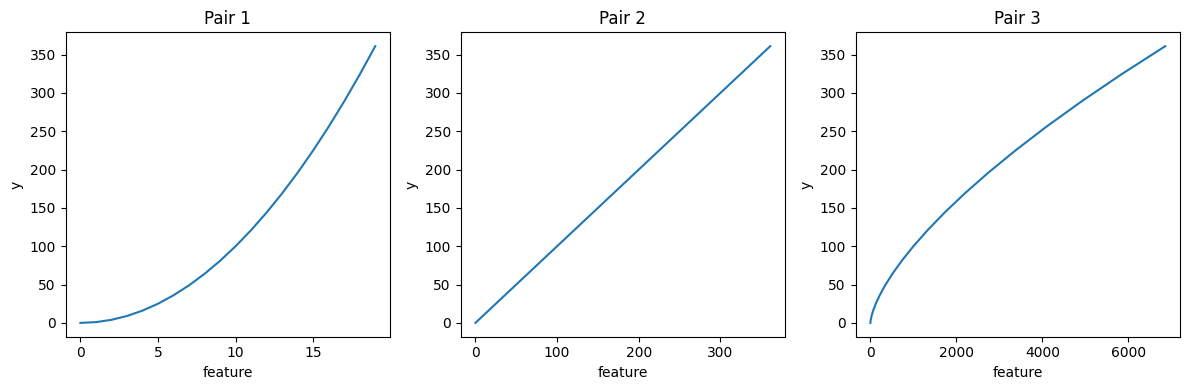

In [44]:
n_features = x_poly.shape[1]

fig, axs = plt.subplots(1, n_features, figsize=(12, 4))

for i in range(n_features):
    axs[i].plot(x_poly[:,i],y)
    axs[i].set_xlabel("feature")
    axs[i].set_ylabel("y")
    axs[i].set_title(f'Pair {i+1}')

plt.tight_layout()
plt.show()


## Answer

In [45]:
print(f"The best feature is one with index {np.argmax(w)}")

The best feature is one with index 1


## Find polynom for $y = cos(x/2)$

In [46]:
x = np.arange(20)
y = np.cos(x/2)

### Create variables for n-th polynom

In [47]:
x_poly = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]

### Scale features (it diverges without scaling)

In [48]:
x_poly_scaled, _, _ = ScaleFeatures(x_poly)

### Run GD

In [49]:
iterations = 1000000
alpha = 0.01

w, b, log = GD(x_poly_scaled, y, iterations, alpha=alpha) # alpha is default

In [50]:
w, b

(array([-3.7026184 ,  3.54511196,  6.45473747,  0.34804044, -4.20532246,
        -4.99061471, -3.20700327, -0.54386717,  1.73399581,  2.89702135,
         2.63080311,  0.88997761, -2.21717121]),
 -0.007287194855839124)

## Answer

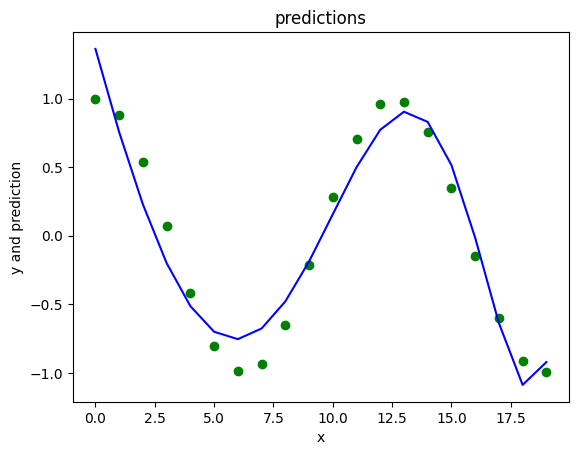

In [52]:
fig, axs = plt.subplots()
axs.scatter(x, y, c='g')
axs.plot(x, np.dot(x_poly_scaled, w) + b, c='b')

# Adding labels and a legend
axs.set_xlabel('x')
axs.set_ylabel('y and prediction')
plt.title('predictions')

# Displaying the chart
plt.show()
